In [1]:
#needed Modules
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#import the csv
file_to_load = "allgames_stats.csv"

# Read Purchasing File and store into Pandas data frame
allgame_stat = pd.read_csv(file_to_load)
allgame_stat.head()

,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1,1996-11-03,LAL,NaN,MIN,W,0,6:00,0.0,1.0,...,1,0,0.0,1.0,1,1,0.0,-1.1,Kobe Bryant,Regular Season
1,2,1996-11-05,LAL,@,NYK,W,0,3:00,0.0,1.0,...,0,0,0.0,0.0,1,0,1.0,-1.1,Kobe Bryant,Regular Season
2,3,1996-11-06,LAL,@,CHH,L,0,7:00,2.0,3.0,...,0,0,0.0,0.0,3,0,5.0,0.7,Kobe Bryant,Regular Season
3,4,1996-11-08,LAL,@,TOR,L,0,17:00,3.0,8.0,...,3,0,0.0,1.0,0,3,10.0,5.2,Kobe Bryant,Regular Season
4,5,1996-11-10,LAL,NaN,ATL,W,0,8:00,0.0,3.0,...,3,1,0.0,0.0,0,0,2.0,1.9,Kobe Bryant,Regular Season


In [3]:
allgame_stat=allgame_stat.fillna(0)

In [4]:
# allgame_stat.PTS.unique()

In [5]:
allgame_stat[("PTS")] = allgame_stat[("PTS")].astype(int)

# allgame_stat = allgame_stat.astype({'PTS': 'int32'})

In [6]:
# allgame_stat.dtypes

In [7]:
allgame_stat_filtered = allgame_stat.loc[:,[
            "Date",
            "Result",
            "Player",
            "RSorPO",]]
allgame_stat_filtered

,Date,Result,Player,RSorPO
0,1996-11-03,W,Kobe Bryant,Regular Season
1,1996-11-05,W,Kobe Bryant,Regular Season
2,1996-11-06,L,Kobe Bryant,Regular Season
3,1996-11-08,L,Kobe Bryant,Regular Season
4,1996-11-10,W,Kobe Bryant,Regular Season
...,...,...,...,...
4249,1998-06-05,W,Michael Jordan,Playoffs
4250,1998-06-07,W,Michael Jordan,Playoffs
4251,1998-06-10,W,Michael Jordan,Playoffs
4252,1998-06-12,L,Michael Jordan,Playoffs


In [8]:
#create dataframes based on player
kobe_total = allgame_stat_filtered[(allgame_stat_filtered['Player']=="Kobe Bryant")]
lebron_total = allgame_stat_filtered[(allgame_stat_filtered['Player']=="Lebron James")]
jordan_total = allgame_stat_filtered[(allgame_stat_filtered['Player']=="Michael Jordan")]

#regular season stats
kobe_rs = kobe_total[(kobe_total['RSorPO']=="Regular Season")]
lebron_rs = lebron_total[(lebron_total['RSorPO']=="Regular Season")]
jordan_rs = jordan_total[(jordan_total['RSorPO']=="Regular Season")]

#playoff stats
kobe_po = kobe_total[(kobe_total['RSorPO']=="Playoffs")]
lebron_po = lebron_total[(lebron_total['RSorPO']=="Playoffs")]
jordan_po = jordan_total[(jordan_total['RSorPO']=="Playoffs")]

In [9]:
#Make a win to loss record for kobe in the regular season
kobe_rs_mod = kobe_rs.groupby('Result')['Result'].agg(['count'])
kobe_rs_record = kobe_rs_mod.sum()

# kobe_rs_mod.insert(1, "Percent" , ((kobe_rs_mod['count']/kobe_rs_mod['count'].sum())*100).map("{:.2f} %".format), True)
kobe_rs_mod = kobe_rs_mod.reindex(index=['W','L'])
kobe_rs_mod =kobe_rs_mod.rename(columns={"count":"Kobe", "Percent":"Percentage of Players"})
print("Kobe's winning percentage for his career during the regular season")
kobe_rs_mod.head()


Kobe's winning percentage for his career during the regular season


,Kobe
Result,
W,836
L,510


In [10]:
#Make a win to loss record for kobe in the Playoffs
kobe_po_mod = kobe_po.groupby('Result')['Result'].agg(['count'])
kobe_po_record = kobe_po_mod.sum()

# kobe_rs_mod.insert(1, "Percent" , ((kobe_rs_mod['count']/kobe_rs_mod['count'].sum())*100).map("{:.2f} %".format), True)
kobe_po_mod = kobe_po_mod.reindex(index=['W','L'])
kobe_po_mod =kobe_po_mod.rename(columns={"count":"Kobe", "Percent":"Percentage of Players"})
print("Kobe's winning percentage for his career during the playoffs")
kobe_po_mod.head()

Kobe's winning percentage for his career during the playoffs


,Kobe
Result,
W,135
L,85


In [11]:
#Make a win to loss record for lebron in the regular season
lebron_rs_mod = lebron_rs.groupby('Result')['Result'].agg(['count'])
lebron_rs_record = lebron_rs_mod.sum()

# lebron_rs_mod.insert(1, "Percent" , ((lebron_rs_mod['count']/lebron_rs_mod['count'].sum())*100).map("{:.2f} %".format), True)
lebron_rs_mod = lebron_rs_mod.reindex(index=['W','L'])
lebron_rs_mod =lebron_rs_mod.rename(columns={"count":"Lebron", "Percent":"Percentage of Players"})
print("Lebron's winning percentage for his career during the regular season")
lebron_rs_mod.head()


Lebron's winning percentage for his career during the regular season


,Lebron
Result,
W,789
L,409


In [12]:
#Make a win to loss record for lebron in the playoffs
lebron_po_mod = lebron_po.groupby('Result')['Result'].agg(['count'])
lebron_po_record = lebron_po_mod.sum()

# lebron_rs_mod.insert(1, "Percent" , ((lebron_rs_mod['count']/lebron_rs_mod['count'].sum())*100).map("{:.2f} %".format), True)
lebron_po_mod = lebron_po_mod.reindex(index=['W','L'])
lebron_po_mod =lebron_po_mod.rename(columns={"count":"Lebron", "Percent":"Percentage of Players"})
print("Lebron's winning percentage for his career during the playoffs")
lebron_po_mod.head()


Lebron's winning percentage for his career during the playoffs


,Lebron
Result,
W,156
L,83


In [13]:
#Make a win to loss record for lebron in the regular season
jordan_rs_mod = jordan_rs.groupby('Result')['Result'].agg(['count'])
jordan_rs_record = jordan_rs_mod.sum()

# jordan_rs_mod.insert(1, "Percent" , ((jordan_rs_mod['count']/jordan_rs_mod['count'].sum())
#                                      *100).map("{:.2f}".format), True)
                    
jordan_rs_mod = jordan_rs_mod.reindex(index=['W','L'])
jordan_rs_mod =jordan_rs_mod.rename(columns={"count":"Jordan"
                                             , "Percent":"Percentage of Wins (%)"
                                            })

# jordan_rs_mod["Percent":"Percentage of Wins (%)"] = jordan_rs_mod["Percent":"Percentage of Wins (%)"].astype(str).astype(float)


print("Jordan's winning percentage for his career during the regular season")
jordan_rs_mod



Jordan's winning percentage for his career during the regular season


,Jordan
Result,
W,706
L,366


In [14]:
#Make a win to loss record for lebron in the playoffs
jordan_po_mod = jordan_po.groupby('Result')['Result'].agg(['count'])
jordan_po_record = jordan_po_mod.sum()

# jordan_rs_mod.insert(1, "Percent" , ((jordan_rs_mod['count']/jordan_rs_mod['count'].sum())
#                                      *100).map("{:.2f}".format), True)
                    
jordan_po_mod = jordan_po_mod.reindex(index=['W','L'])
jordan_po_mod =jordan_po_mod.rename(columns={"count":"Jordan"
                                             , "Percent":"Percentage of Wins (%)"
                                            })

# jordan_rs_mod["Percent":"Percentage of Wins (%)"] = jordan_rs_mod["Percent":"Percentage of Wins (%)"].astype(str).astype(float)


print("Jordan's winning percentage for his career during the playoffs")
jordan_po_mod

Jordan's winning percentage for his career during the playoffs


,Jordan
Result,
W,119
L,60


In [15]:
jordan_rs_mod.dtypes


Jordan    int64
dtype: object

In [16]:
merge_goat_rs = pd.merge(jordan_rs_mod,lebron_rs_mod, on='Result', how="left")
merge_goat_rs = pd.merge(merge_goat_rs,kobe_rs_mod, on='Result', how="left")

merge_goat_rs

,Jordan,Lebron,Kobe
Result,,,
W,706,789,836
L,366,409,510


Text(0, 0.5, 'Percent')

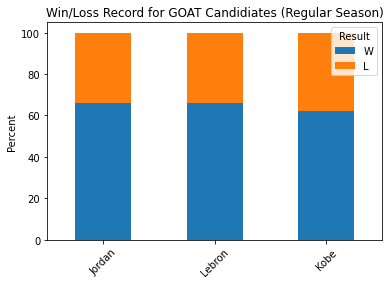

In [17]:
merge_goat_rs.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)

plt.xticks([0,1, 2], ['Jordan', 'Lebron', 'Kobe'],rotation=45)
plt.title("Win/Loss Record for GOAT Candidiates (Regular Season)")
# plt.rcParams["figure.figsize"] = (100,8)
plt.ylabel("Percent")



In [18]:
merge_goat_po = pd.merge(jordan_po_mod,lebron_po_mod, on='Result', how="left")
merge_goat_po = pd.merge(merge_goat_po,kobe_po_mod, on='Result', how="left")

merge_goat_po.T

Result,W,L
Jordan,119,60
Lebron,156,83
Kobe,135,85


Text(0, 0.5, 'Percent')

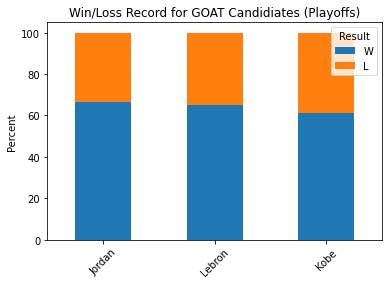

In [19]:
merge_goat_po.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)

plt.xticks([0,1, 2], ['Jordan', 'Lebron', 'Kobe'],rotation=45)
plt.title("Win/Loss Record for GOAT Candidiates (Playoffs)")
# plt.rcParams["figure.figsize"] = (100,8)
plt.ylabel("Percent")



In [20]:
total = merge_goat_po.T['W'] + merge_goat_po.T['L']
rel = merge_goat_po.T.div(total, 0)*100

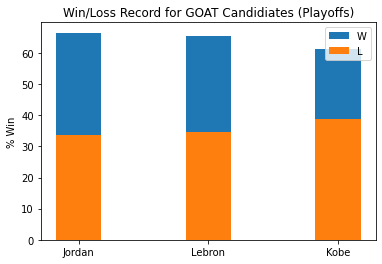

In [21]:
wins = (rel['W']).to_numpy()
loss = (rel['L']).to_numpy()
goat = ['Jordan', 'Lebron', 'Kobe']

width = 0.35   

fig, ax = plt.subplots()

ax.bar(goat, wins, width, label='W')
ax.bar(goat, loss, width,
       label='L')

ax.set_ylabel('% Win')
ax.set_title("Win/Loss Record for GOAT Candidiates (Playoffs)")
ax.legend()

plt.show()

In [22]:
rel=rel.reset_index()
rel.head()

Result,index,W,L
0,Jordan,66.480447,33.519553
1,Lebron,65.271967,34.728033
2,Kobe,61.363636,38.636364


<AxesSubplot:title={'center':'Win/Loss Record for GOAT Candidiates (Playoffs)'}, ylabel='index'>

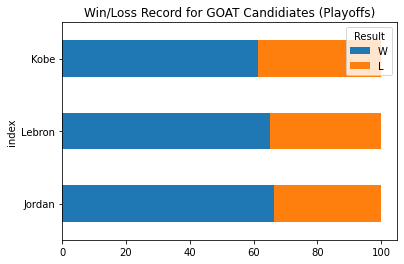

In [23]:
rel.plot(
    x = 'index',
    kind = 'barh',
    stacked = True,
    title = 'Win/Loss Record for GOAT Candidiates (Playoffs)',
    mark_right = True)


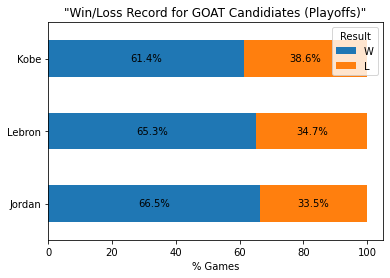

In [24]:
rel.plot(
    x = 'index',
    kind = 'barh',
    stacked = True,
    title = '"Win/Loss Record for GOAT Candidiates (Playoffs)"',
    mark_right = True)

rel_total = rel["W"] + rel["L"]
rel_rel = rel[rel.columns[1:]].div(rel_total, 0)*100

plt.ylabel('')
plt.xlabel('% Games')


for n in rel_rel:
    for i, (cs, ab, pc) in enumerate(zip(rel.iloc[:, 1:].cumsum(1)[n], 
                                         rel[n], rel_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
        
plt.savefig('Win_Loss_PO.png')    


In [28]:
total2 = merge_goat_rs.T['W'] + merge_goat_rs.T['L']
rel2 = merge_goat_rs.T.div(total2, 0)*100

In [29]:
rel2=rel2.reset_index()
rel2.head()

Result,index,W,L
0,Jordan,65.858209,34.141791
1,Lebron,65.859766,34.140234
2,Kobe,62.109955,37.890045


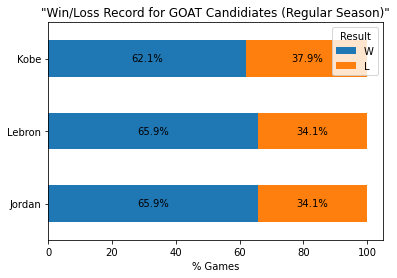

In [30]:
rel2.plot(
    x = 'index',
    kind = 'barh',
    stacked = True,
    title = '"Win/Loss Record for GOAT Candidiates (Regular Season)"',
    mark_right = True)

rel2_total = rel2["W"] + rel2["L"]
rel2_rel = rel2[rel2.columns[1:]].div(rel2_total, 0)*100

plt.ylabel('')
plt.xlabel('% Games')


for n in rel2_rel:
    for i, (cs, ab, pc) in enumerate(zip(rel2.iloc[:, 1:].cumsum(1)[n], 
                                         rel2[n], rel2_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
        
        
plt.savefig('Win_Loss_RS.png')
        